In [1]:
import random
import json
import requests
from config import api_key_alpha
from pprint import pprint
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

In [2]:
#Create Data Fram of trades since 1/1/2021
query_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=60min&outputsize=full&apikey={api_key_alpha}"

In [3]:
gme_get = requests.get(query_url).json()

pprint(gme_get)

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close '
                                 'prices and volume',
               '2. Symbol': 'GME',
               '3. Last Refreshed': '2021-03-19 20:00:00',
               '4. Interval': '60min',
               '5. Output Size': 'Full size',
               '6. Time Zone': 'US/Eastern'},
 'Time Series (60min)': {'2021-01-25 05:00:00': {'1. open': '72.5000',
                                                 '2. high': '136.6300',
                                                 '3. low': '72.2000',
                                                 '4. close': '105.3900',
                                                 '5. volume': '1194735'},
                         '2021-01-25 06:00:00': {'1. open': '106.7700',
                                                 '2. high': '109.0000',
                                                 '3. low': '86.2500',
                                                 '4. close': '96.7700',

                                                 '5. volume': '171440'},
                         '2021-02-01 05:00:00': {'1. open': '356.1000',
                                                 '2. high': '384.8900',
                                                 '3. low': '321.7500',
                                                 '4. close': '348.0000',
                                                 '5. volume': '286953'},
                         '2021-02-01 06:00:00': {'1. open': '347.0000',
                                                 '2. high': '356.3600',
                                                 '3. low': '326.0500',
                                                 '4. close': '337.0000',
                                                 '5. volume': '113164'},
                         '2021-02-01 07:00:00': {'1. open': '338.0000',
                                                 '2. high': '345.0000',
                                                 '3. low': '3

                                                 '2. high': '109.5983',
                                                 '3. low': '97.4600',
                                                 '4. close': '107.4999',
                                                 '5. volume': '5796189'},
                         '2021-02-03 15:00:00': {'1. open': '107.0100',
                                                 '2. high': '107.7599',
                                                 '3. low': '93.5500',
                                                 '4. close': '97.9400',
                                                 '5. volume': '3877387'},
                         '2021-02-03 16:00:00': {'1. open': '98.0100',
                                                 '2. high': '100.3745',
                                                 '3. low': '90.5900',
                                                 '4. close': '92.0431',
                                                 '5. volume': '379

                                                 '4. close': '49.4700',
                                                 '5. volume': '317156'},
                         '2021-02-10 18:00:00': {'1. open': '49.4700',
                                                 '2. high': '51.2000',
                                                 '3. low': '49.4500',
                                                 '4. close': '50.2000',
                                                 '5. volume': '200800'},
                         '2021-02-10 19:00:00': {'1. open': '50.2000',
                                                 '2. high': '50.2500',
                                                 '3. low': '49.6500',
                                                 '4. close': '49.9900',
                                                 '5. volume': '50156'},
                         '2021-02-10 20:00:00': {'1. open': '49.9499',
                                                 '2. high': '50.1800',


                         '2021-02-19 05:00:00': {'1. open': '40.2000',
                                                 '2. high': '41.7500',
                                                 '3. low': '40.2000',
                                                 '4. close': '41.6800',
                                                 '5. volume': '6725'},
                         '2021-02-19 06:00:00': {'1. open': '41.6000',
                                                 '2. high': '41.7200',
                                                 '3. low': '41.4000',
                                                 '4. close': '41.4000',
                                                 '5. volume': '2503'},
                         '2021-02-19 07:00:00': {'1. open': '41.4000',
                                                 '2. high': '41.4000',
                                                 '3. low': '40.5500',
                                                 '4. close': '41.0000',
      

                                                 '3. low': '44.0000',
                                                 '4. close': '44.0000',
                                                 '5. volume': '1635'},
                         '2021-02-24 06:00:00': {'1. open': '43.7600',
                                                 '2. high': '44.0000',
                                                 '3. low': '43.7200',
                                                 '4. close': '43.9900',
                                                 '5. volume': '1336'},
                         '2021-02-24 07:00:00': {'1. open': '43.9900',
                                                 '2. high': '44.5000',
                                                 '3. low': '43.9900',
                                                 '4. close': '44.0100',
                                                 '5. volume': '1021'},
                         '2021-02-24 08:00:00': {'1. open': '44.4000',
      

                         '2021-02-26 08:00:00': {'1. open': '119.9800',
                                                 '2. high': '130.0000',
                                                 '3. low': '118.0000',
                                                 '4. close': '122.6900',
                                                 '5. volume': '1360295'},
                         '2021-02-26 09:00:00': {'1. open': '120.2500',
                                                 '2. high': '129.9701',
                                                 '3. low': '115.6000',
                                                 '4. close': '120.3000',
                                                 '5. volume': '1241999'},
                         '2021-02-26 10:00:00': {'1. open': '120.4100',
                                                 '2. high': '142.9000',
                                                 '3. low': '114.5000',
                                                 '4. close': 

                                                 '5. volume': '2352121'},
                         '2021-03-04 11:00:00': {'1. open': '115.9800',
                                                 '2. high': '122.6000',
                                                 '3. low': '115.9800',
                                                 '4. close': '121.4431',
                                                 '5. volume': '2666457'},
                         '2021-03-04 12:00:00': {'1. open': '121.6100',
                                                 '2. high': '126.6000',
                                                 '3. low': '118.3900',
                                                 '4. close': '123.1000',
                                                 '5. volume': '2232172'},
                         '2021-03-04 13:00:00': {'1. open': '123.2000',
                                                 '2. high': '126.0000',
                                                 '3. low':

                         '2021-03-10 05:00:00': {'1. open': '271.2000',
                                                 '2. high': '295.9200',
                                                 '3. low': '269.0000',
                                                 '4. close': '287.1000',
                                                 '5. volume': '396419'},
                         '2021-03-10 06:00:00': {'1. open': '287.5000',
                                                 '2. high': '289.5000',
                                                 '3. low': '279.0200',
                                                 '4. close': '281.7000',
                                                 '5. volume': '125970'},
                         '2021-03-10 07:00:00': {'1. open': '281.4200',
                                                 '2. high': '281.4200',
                                                 '3. low': '273.0000',
                                                 '4. close': '2

                                                 '3. low': '199.0000',
                                                 '4. close': '205.5200',
                                                 '5. volume': '59737'},
                         '2021-03-17 09:00:00': {'1. open': '199.0000',
                                                 '2. high': '217.9500',
                                                 '3. low': '199.0000',
                                                 '4. close': '216.7200',
                                                 '5. volume': '288336'},
                         '2021-03-17 10:00:00': {'1. open': '216.3000',
                                                 '2. high': '231.4700',
                                                 '3. low': '213.0000',
                                                 '4. close': '222.6500',
                                                 '5. volume': '4113321'},
                         '2021-03-17 11:00:00': {'1. open': '

In [4]:
GME_df_hourly = pd.DataFrame(gme_get['Time Series (60min)']).T
GME_df_hourly = GME_df_hourly.rename(columns={'1. open': 'Opening Price',
                                '2. high': 'Highest Price',
                                '3. low': 'Lowest Price',
                                '4. close': 'Closing Price',
                                '5. volume': 'Trade Volume'})
GME_df_hourly



,Opening Price,Highest Price,Lowest Price,Closing Price,Trade Volume
2021-03-19 20:00:00,199.9800,199.9900,198.5601,199.0000,20719
2021-03-19 19:00:00,200.2400,200.2900,199.0000,200.0000,35919
2021-03-19 18:00:00,200.0000,200.4000,199.5500,200.2400,46334
2021-03-19 17:00:00,200.2700,201.0000,198.2500,200.4000,333311
2021-03-19 16:00:00,212.2300,212.2300,199.4600,199.4600,2566184
...,...,...,...,...,...
2021-01-25 09:00:00,91.7100,104.5300,86.9999,98.0500,4674120
2021-01-25 08:00:00,94.4800,97.0000,86.7200,91.6500,2187519
2021-01-25 07:00:00,96.9300,101.7000,90.3500,94.4300,784325
2021-01-25 06:00:00,106.7700,109.0000,86.2500,96.7700,885972


In [5]:
#Create Lists:
opening = GME_df_hourly['Opening Price'].astype(float)
closing = GME_df_hourly['Closing Price'].astype(float)
low = GME_df_hourly['Lowest Price'].astype(float)
high = GME_df_hourly['Highest Price'].astype(float)
volume = GME_df_hourly['Trade Volume'].astype(float)

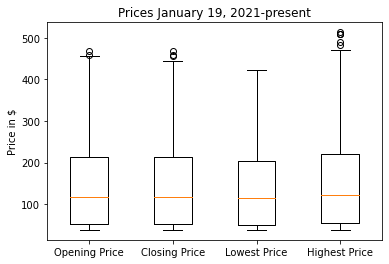

In [6]:
#Make boxplot of prices
fig1, ax1 = plt.subplots()
plot_GME = [opening,closing,low,high]
price_labels = ["Opening Price", "Closing Price","Lowest Price","Highest Price"]
ax1.set_title('Prices January 19, 2021-present')
ax1.set_ylabel('Price in $')
ax1.boxplot(plot_GME,labels=price_labels)

plt.show()

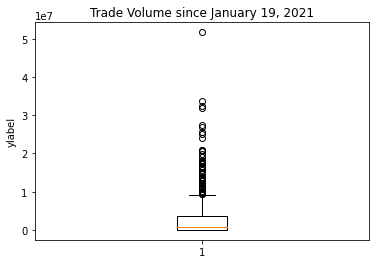

In [7]:
#Make box plot of trade Volume
fig1, ax1 = plt.subplots()
ax1.set_title('Trade Volume since January 19, 2021')
ax1.set_ylabel('ylabel')
ax1.boxplot(volume)
plt.show()

In [8]:
#Get daily data set for all time and use this to find outliers for price over time

url_daily = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GME&outputsize=full&apikey={api_key_alpha}"
    
gme_daily = requests.get(url_daily).json()

pprint(gme_daily)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and '
                                 'Volumes',
               '2. Symbol': 'GME',
               '3. Last Refreshed': '2021-03-19',
               '4. Output Size': 'Full size',
               '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2002-02-13': {'1. open': '19.2500',
                                        '2. high': '20.1200',
                                        '3. low': '19.0500',
                                        '4. close': '20.1000',
                                        '5. volume': '9527000'},
                         '2002-02-14': {'1. open': '20.3500',
                                        '2. high': '20.3900',
                                        '3. low': '19.8500',
                                        '4. close': '20.0000',
                                        '5. volume': '1377700'},
                         '2002-02-15': {'1. open': '20.0500',
             

                         '2002-06-04': {'1. open': '23.2100',
                                        '2. high': '23.9000',
                                        '3. low': '22.9000',
                                        '4. close': '23.4300',
                                        '5. volume': '241700'},
                         '2002-06-05': {'1. open': '23.5000',
                                        '2. high': '23.6800',
                                        '3. low': '23.1100',
                                        '4. close': '23.2500',
                                        '5. volume': '219000'},
                         '2002-06-06': {'1. open': '23.2500',
                                        '2. high': '23.6500',
                                        '3. low': '23.1900',
                                        '4. close': '23.2500',
                                        '5. volume': '175400'},
                         '2002-06-07': {'1. open': '23.0000',
  

                                        '5. volume': '74900'},
                         '2002-09-12': {'1. open': '21.0500',
                                        '2. high': '21.0800',
                                        '3. low': '20.4000',
                                        '4. close': '20.4000',
                                        '5. volume': '146500'},
                         '2002-09-13': {'1. open': '20.2000',
                                        '2. high': '20.2000',
                                        '3. low': '19.6000',
                                        '4. close': '19.6000',
                                        '5. volume': '36000'},
                         '2002-09-16': {'1. open': '19.6100',
                                        '2. high': '20.2400',
                                        '3. low': '19.6000',
                                        '4. close': '20.2100',
                                        '5. volume': '60600'},
   

                                        '4. close': '8.8700',
                                        '5. volume': '492600'},
                         '2003-01-31': {'1. open': '8.8700',
                                        '2. high': '8.9300',
                                        '3. low': '8.5000',
                                        '4. close': '8.5000',
                                        '5. volume': '276000'},
                         '2003-02-03': {'1. open': '8.6000',
                                        '2. high': '8.8100',
                                        '3. low': '8.2000',
                                        '4. close': '8.2600',
                                        '5. volume': '268700'},
                         '2003-02-04': {'1. open': '8.2000',
                                        '2. high': '8.6500',
                                        '3. low': '8.1600',
                                        '4. close': '8.4900',
              

                                        '5. volume': '725600'},
                         '2003-06-02': {'1. open': '12.5500',
                                        '2. high': '13.0400',
                                        '3. low': '12.5500',
                                        '4. close': '12.6400',
                                        '5. volume': '785000'},
                         '2003-06-03': {'1. open': '12.8000',
                                        '2. high': '12.8000',
                                        '3. low': '12.4600',
                                        '4. close': '12.6200',
                                        '5. volume': '403100'},
                         '2003-06-04': {'1. open': '12.7000',
                                        '2. high': '12.8000',
                                        '3. low': '12.5000',
                                        '4. close': '12.6000',
                                        '5. volume': '309500'},


                         '2003-09-29': {'1. open': '16.2500',
                                        '2. high': '16.3200',
                                        '3. low': '15.6500',
                                        '4. close': '16.3000',
                                        '5. volume': '213900'},
                         '2003-09-30': {'1. open': '16.4000',
                                        '2. high': '16.4500',
                                        '3. low': '15.7500',
                                        '4. close': '15.9000',
                                        '5. volume': '166100'},
                         '2003-10-01': {'1. open': '15.9000',
                                        '2. high': '16.6500',
                                        '3. low': '15.9000',
                                        '4. close': '16.2500',
                                        '5. volume': '253900'},
                         '2003-10-02': {'1. open': '16.2000',
  

                                        '3. low': '16.3100',
                                        '4. close': '16.5500',
                                        '5. volume': '188800'},
                         '2004-01-29': {'1. open': '16.5000',
                                        '2. high': '16.9400',
                                        '3. low': '15.9300',
                                        '4. close': '16.5000',
                                        '5. volume': '275200'},
                         '2004-01-30': {'1. open': '16.4000',
                                        '2. high': '16.7800',
                                        '3. low': '16.3000',
                                        '4. close': '16.6000',
                                        '5. volume': '144000'},
                         '2004-02-02': {'1. open': '16.6000',
                                        '2. high': '17.0500',
                                        '3. low': '16.3300',
   

                                        '5. volume': '405500'},
                         '2004-05-27': {'1. open': '15.6600',
                                        '2. high': '15.9000',
                                        '3. low': '15.6200',
                                        '4. close': '15.7300',
                                        '5. volume': '180100'},
                         '2004-05-28': {'1. open': '15.7300',
                                        '2. high': '15.8000',
                                        '3. low': '15.6000',
                                        '4. close': '15.6200',
                                        '5. volume': '246500'},
                         '2004-06-01': {'1. open': '15.6200',
                                        '2. high': '15.8400',
                                        '3. low': '15.5100',
                                        '4. close': '15.5200',
                                        '5. volume': '334600'},


                         '2004-08-25': {'1. open': '16.9600',
                                        '2. high': '17.0700',
                                        '3. low': '16.8800',
                                        '4. close': '17.0000',
                                        '5. volume': '92900'},
                         '2004-08-26': {'1. open': '16.9500',
                                        '2. high': '17.0600',
                                        '3. low': '16.8100',
                                        '4. close': '16.8700',
                                        '5. volume': '77900'},
                         '2004-08-27': {'1. open': '16.9500',
                                        '2. high': '17.0700',
                                        '3. low': '16.8800',
                                        '4. close': '16.9900',
                                        '5. volume': '121000'},
                         '2004-08-30': {'1. open': '16.9400',
    

                                        '4. close': '20.6000',
                                        '5. volume': '1831600'},
                         '2004-11-24': {'1. open': '20.8500',
                                        '2. high': '21.4800',
                                        '3. low': '20.7700',
                                        '4. close': '21.4800',
                                        '5. volume': '880600'},
                         '2004-11-26': {'1. open': '21.4800',
                                        '2. high': '21.7800',
                                        '3. low': '21.4100',
                                        '4. close': '21.7000',
                                        '5. volume': '149500'},
                         '2004-11-29': {'1. open': '22.0000',
                                        '2. high': '22.0000',
                                        '3. low': '21.3500',
                                        '4. close': '21.3500',


                                        '3. low': '22.5600',
                                        '4. close': '22.5700',
                                        '5. volume': '482500'},
                         '2005-03-30': {'1. open': '22.5000',
                                        '2. high': '22.7900',
                                        '3. low': '22.2700',
                                        '4. close': '22.7200',
                                        '5. volume': '274500'},
                         '2005-03-31': {'1. open': '22.6500',
                                        '2. high': '22.7300',
                                        '3. low': '22.0300',
                                        '4. close': '22.1600',
                                        '5. volume': '240000'},
                         '2005-04-01': {'1. open': '22.4100',
                                        '2. high': '22.5000',
                                        '3. low': '21.5600',
   

                                        '2. high': '34.6600',
                                        '3. low': '34.1300',
                                        '4. close': '34.1800',
                                        '5. volume': '260300'},
                         '2005-07-26': {'1. open': '33.6500',
                                        '2. high': '34.2800',
                                        '3. low': '32.8200',
                                        '4. close': '34.0500',
                                        '5. volume': '1250400'},
                         '2005-07-27': {'1. open': '34.5000',
                                        '2. high': '34.9800',
                                        '3. low': '34.4000',
                                        '4. close': '34.9600',
                                        '5. volume': '661700'},
                         '2005-07-28': {'1. open': '34.9600',
                                        '2. high': '35.5000',
 

                                        '3. low': '35.2100',
                                        '4. close': '36.2700',
                                        '5. volume': '2681000'},
                         '2005-11-21': {'1. open': '36.8100',
                                        '2. high': '37.8200',
                                        '3. low': '36.0700',
                                        '4. close': '37.8000',
                                        '5. volume': '2436000'},
                         '2005-11-22': {'1. open': '37.8000',
                                        '2. high': '38.1899',
                                        '3. low': '36.0100',
                                        '4. close': '36.5800',
                                        '5. volume': '3487200'},
                         '2005-11-23': {'1. open': '36.6000',
                                        '2. high': '36.8000',
                                        '3. low': '35.4000',


                                        '5. volume': '1197300'},
                         '2006-03-23': {'1. open': '44.9500',
                                        '2. high': '46.1000',
                                        '3. low': '44.9500',
                                        '4. close': '45.1800',
                                        '5. volume': '1237300'},
                         '2006-03-24': {'1. open': '45.1900',
                                        '2. high': '47.1400',
                                        '3. low': '44.9600',
                                        '4. close': '46.8100',
                                        '5. volume': '1074100'},
                         '2006-03-27': {'1. open': '46.6000',
                                        '2. high': '47.9300',
                                        '3. low': '46.4400',
                                        '4. close': '46.8800',
                                        '5. volume': '1113800

                                        '4. close': '36.7800',
                                        '5. volume': '979100'},
                         '2006-06-28': {'1. open': '36.8900',
                                        '2. high': '37.2200',
                                        '3. low': '36.6100',
                                        '4. close': '37.1400',
                                        '5. volume': '1120000'},
                         '2006-06-29': {'1. open': '37.7200',
                                        '2. high': '39.1600',
                                        '3. low': '37.3400',
                                        '4. close': '39.1600',
                                        '5. volume': '1254800'},
                         '2006-06-30': {'1. open': '39.2100',
                                        '2. high': '42.0000',
                                        '3. low': '37.9100',
                                        '4. close': '42.0000',

                                        '2. high': '48.3500',
                                        '3. low': '47.1100',
                                        '4. close': '47.9900',
                                        '5. volume': '1744000'},
                         '2006-10-11': {'1. open': '47.9900',
                                        '2. high': '49.6500',
                                        '3. low': '47.6300',
                                        '4. close': '49.0500',
                                        '5. volume': '1826100'},
                         '2006-10-12': {'1. open': '49.1000',
                                        '2. high': '50.7000',
                                        '3. low': '48.9000',
                                        '4. close': '50.2700',
                                        '5. volume': '1618600'},
                         '2006-10-13': {'1. open': '50.9500',
                                        '2. high': '52.6500',

                         '2007-01-22': {'1. open': '55.9200',
                                        '2. high': '56.0700',
                                        '3. low': '54.5000',
                                        '4. close': '55.0500',
                                        '5. volume': '1620100'},
                         '2007-01-23': {'1. open': '55.0000',
                                        '2. high': '55.6100',
                                        '3. low': '54.8500',
                                        '4. close': '54.9200',
                                        '5. volume': '833800'},
                         '2007-01-24': {'1. open': '55.1700',
                                        '2. high': '56.3300',
                                        '3. low': '55.1700',
                                        '4. close': '55.7600',
                                        '5. volume': '761100'},
                         '2007-01-25': {'1. open': '55.9100',
 

                                        '5. volume': '1930100'},
                         '2007-04-18': {'1. open': '33.9300',
                                        '2. high': '34.0900',
                                        '3. low': '33.4500',
                                        '4. close': '33.5200',
                                        '5. volume': '1040600'},
                         '2007-04-19': {'1. open': '33.1300',
                                        '2. high': '33.3500',
                                        '3. low': '32.6200',
                                        '4. close': '33.0300',
                                        '5. volume': '1818200'},
                         '2007-04-20': {'1. open': '33.7500',
                                        '2. high': '34.3000',
                                        '3. low': '33.4900',
                                        '4. close': '34.0500',
                                        '5. volume': '1729600

                                        '3. low': '40.0000',
                                        '4. close': '40.6900',
                                        '5. volume': '1697100'},
                         '2007-08-14': {'1. open': '40.9600',
                                        '2. high': '41.2100',
                                        '3. low': '39.7500',
                                        '4. close': '40.0700',
                                        '5. volume': '1948000'},
                         '2007-08-15': {'1. open': '39.8900',
                                        '2. high': '40.7500',
                                        '3. low': '39.2700',
                                        '4. close': '39.5400',
                                        '5. volume': '2137200'},
                         '2007-08-16': {'1. open': '38.7400',
                                        '2. high': '39.1200',
                                        '3. low': '37.4000',


                                        '2. high': '55.0300',
                                        '3. low': '52.3800',
                                        '4. close': '54.4300',
                                        '5. volume': '2153500'},
                         '2007-11-14': {'1. open': '56.8000',
                                        '2. high': '56.9300',
                                        '3. low': '53.6601',
                                        '4. close': '53.8700',
                                        '5. volume': '2336800'},
                         '2007-11-15': {'1. open': '54.6400',
                                        '2. high': '56.5600',
                                        '3. low': '53.8700',
                                        '4. close': '55.9300',
                                        '5. volume': '3022800'},
                         '2007-11-16': {'1. open': '55.6700',
                                        '2. high': '55.6700',

                         '2008-01-18': {'1. open': '50.0100',
                                        '2. high': '51.9800',
                                        '3. low': '49.0500',
                                        '4. close': '49.3200',
                                        '5. volume': '3875300'},
                         '2008-01-22': {'1. open': '46.7000',
                                        '2. high': '51.0700',
                                        '3. low': '44.7600',
                                        '4. close': '50.4700',
                                        '5. volume': '6163300'},
                         '2008-01-23': {'1. open': '49.0900',
                                        '2. high': '52.1200',
                                        '3. low': '47.7500',
                                        '4. close': '52.0500',
                                        '5. volume': '5774800'},
                         '2008-01-24': {'1. open': '52.4500',

                                        '5. volume': '2412000'},
                         '2008-03-07': {'1. open': '42.9100',
                                        '2. high': '44.0800',
                                        '3. low': '41.9100',
                                        '4. close': '42.6800',
                                        '5. volume': '1960600'},
                         '2008-03-10': {'1. open': '42.6300',
                                        '2. high': '43.8600',
                                        '3. low': '42.4200',
                                        '4. close': '43.3300',
                                        '5. volume': '3143200'},
                         '2008-03-11': {'1. open': '45.3400',
                                        '2. high': '46.8900',
                                        '3. low': '44.7300',
                                        '4. close': '46.8700',
                                        '5. volume': '3425500

                         '2008-05-16': {'1. open': '55.1300',
                                        '2. high': '55.5000',
                                        '3. low': '52.2800',
                                        '4. close': '53.8700',
                                        '5. volume': '2684200'},
                         '2008-05-19': {'1. open': '53.6400',
                                        '2. high': '53.9900',
                                        '3. low': '51.8200',
                                        '4. close': '52.2000',
                                        '5. volume': '2094700'},
                         '2008-05-20': {'1. open': '51.6500',
                                        '2. high': '51.8000',
                                        '3. low': '50.5300',
                                        '4. close': '51.5800',
                                        '5. volume': '2897900'},
                         '2008-05-21': {'1. open': '51.8200',

                                        '5. volume': '2515500'},
                         '2008-07-22': {'1. open': '42.6600',
                                        '2. high': '43.9400',
                                        '3. low': '41.6800',
                                        '4. close': '43.4400',
                                        '5. volume': '3025700'},
                         '2008-07-23': {'1. open': '43.4000',
                                        '2. high': '45.5400',
                                        '3. low': '42.8300',
                                        '4. close': '44.2300',
                                        '5. volume': '4159500'},
                         '2008-07-24': {'1. open': '43.7400',
                                        '2. high': '44.4600',
                                        '3. low': '42.3800',
                                        '4. close': '42.5600',
                                        '5. volume': '2018300

                                        '4. close': '43.1000',
                                        '5. volume': '1775200'},
                         '2008-08-28': {'1. open': '43.2600',
                                        '2. high': '44.2900',
                                        '3. low': '43.2600',
                                        '4. close': '44.0900',
                                        '5. volume': '1710700'},
                         '2008-08-29': {'1. open': '44.0000',
                                        '2. high': '44.7500',
                                        '3. low': '43.6400',
                                        '4. close': '43.8700',
                                        '5. volume': '1683700'},
                         '2008-09-02': {'1. open': '44.3400',
                                        '2. high': '46.2300',
                                        '3. low': '44.3400',
                                        '4. close': '45.3800'

                         '2008-12-03': {'1. open': '18.5000',
                                        '2. high': '19.7500',
                                        '3. low': '18.1000',
                                        '4. close': '18.8500',
                                        '5. volume': '4272000'},
                         '2008-12-04': {'1. open': '18.4600',
                                        '2. high': '21.2100',
                                        '3. low': '18.0100',
                                        '4. close': '20.1800',
                                        '5. volume': '3559700'},
                         '2008-12-05': {'1. open': '20.1600',
                                        '2. high': '21.6400',
                                        '3. low': '19.0300',
                                        '4. close': '21.2700',
                                        '5. volume': '4049100'},
                         '2008-12-08': {'1. open': '22.3800',

                         '2009-03-16': {'1. open': '26.0000',
                                        '2. high': '26.0000',
                                        '3. low': '24.2600',
                                        '4. close': '24.4100',
                                        '5. volume': '2730900'},
                         '2009-03-17': {'1. open': '24.3600',
                                        '2. high': '25.0200',
                                        '3. low': '23.8800',
                                        '4. close': '24.9500',
                                        '5. volume': '3169700'},
                         '2009-03-18': {'1. open': '24.8000',
                                        '2. high': '25.7800',
                                        '3. low': '24.3400',
                                        '4. close': '24.8300',
                                        '5. volume': '4689600'},
                         '2009-03-19': {'1. open': '25.1200',

                                        '5. volume': '3466400'},
                         '2009-05-14': {'1. open': '25.6700',
                                        '2. high': '26.8800',
                                        '3. low': '25.2699',
                                        '4. close': '25.9700',
                                        '5. volume': '4750500'},
                         '2009-05-15': {'1. open': '25.8900',
                                        '2. high': '27.1800',
                                        '3. low': '25.8800',
                                        '4. close': '26.4700',
                                        '5. volume': '4246800'},
                         '2009-05-18': {'1. open': '26.8400',
                                        '2. high': '26.8400',
                                        '3. low': '25.5800',
                                        '4. close': '26.2800',
                                        '5. volume': '4495000

                                        '4. close': '23.6200',
                                        '5. volume': '5026300'},
                         '2009-07-23': {'1. open': '23.6300',
                                        '2. high': '24.2000',
                                        '3. low': '23.1400',
                                        '4. close': '23.9000',
                                        '5. volume': '5960600'},
                         '2009-07-24': {'1. open': '23.4600',
                                        '2. high': '24.2500',
                                        '3. low': '23.3300',
                                        '4. close': '24.1500',
                                        '5. volume': '5357400'},
                         '2009-07-27': {'1. open': '24.0400',
                                        '2. high': '24.1100',
                                        '3. low': '23.1500',
                                        '4. close': '23.5300'

                         '2009-10-07': {'1. open': '26.3400',
                                        '2. high': '26.6300',
                                        '3. low': '26.1000',
                                        '4. close': '26.2400',
                                        '5. volume': '4008200'},
                         '2009-10-08': {'1. open': '27.0500',
                                        '2. high': '27.6500',
                                        '3. low': '26.6800',
                                        '4. close': '27.3700',
                                        '5. volume': '7316000'},
                         '2009-10-09': {'1. open': '27.3600',
                                        '2. high': '27.3600',
                                        '3. low': '26.7650',
                                        '4. close': '26.9600',
                                        '5. volume': '3861300'},
                         '2009-10-12': {'1. open': '27.0700',

                                        '2. high': '20.5900',
                                        '3. low': '20.1100',
                                        '4. close': '20.3200',
                                        '5. volume': '7021300'},
                         '2010-01-12': {'1. open': '20.6600',
                                        '2. high': '20.8000',
                                        '3. low': '20.3000',
                                        '4. close': '20.7700',
                                        '5. volume': '7121500'},
                         '2010-01-13': {'1. open': '20.8300',
                                        '2. high': '20.9000',
                                        '3. low': '20.6200',
                                        '4. close': '20.7900',
                                        '5. volume': '4446900'},
                         '2010-01-14': {'1. open': '20.7200',
                                        '2. high': '20.8300',

                         '2010-03-12': {'1. open': '19.5300',
                                        '2. high': '19.8400',
                                        '3. low': '19.1200',
                                        '4. close': '19.2100',
                                        '5. volume': '4847700'},
                         '2010-03-15': {'1. open': '19.1900',
                                        '2. high': '19.4500',
                                        '3. low': '18.7400',
                                        '4. close': '19.4000',
                                        '5. volume': '4196500'},
                         '2010-03-16': {'1. open': '19.4900',
                                        '2. high': '19.4900',
                                        '3. low': '19.0950',
                                        '4. close': '19.4100',
                                        '5. volume': '3505700'},
                         '2010-03-17': {'1. open': '19.3900',

                                        '2. high': '23.2300',
                                        '3. low': '22.2800',
                                        '4. close': '23.1400',
                                        '5. volume': '5176000'},
                         '2010-05-13': {'1. open': '23.1100',
                                        '2. high': '23.4500',
                                        '3. low': '22.6500',
                                        '4. close': '22.6800',
                                        '5. volume': '3599100'},
                         '2010-05-14': {'1. open': '21.7000',
                                        '2. high': '22.3000',
                                        '3. low': '20.8701',
                                        '4. close': '21.8500',
                                        '5. volume': '9468500'},
                         '2010-05-17': {'1. open': '21.8300',
                                        '2. high': '22.0500',

                         '2010-07-20': {'1. open': '19.1400',
                                        '2. high': '19.8125',
                                        '3. low': '19.0800',
                                        '4. close': '19.8000',
                                        '5. volume': '2847000'},
                         '2010-07-21': {'1. open': '19.8400',
                                        '2. high': '20.0400',
                                        '3. low': '19.6100',
                                        '4. close': '19.6600',
                                        '5. volume': '4129300'},
                         '2010-07-22': {'1. open': '19.8500',
                                        '2. high': '20.1101',
                                        '3. low': '19.7200',
                                        '4. close': '19.9900',
                                        '5. volume': '3282900'},
                         '2010-07-23': {'1. open': '19.9200',

                         '2010-09-21': {'1. open': '19.5600',
                                        '2. high': '19.7450',
                                        '3. low': '19.3000',
                                        '4. close': '19.4800',
                                        '5. volume': '3303200'},
                         '2010-09-22': {'1. open': '19.4300',
                                        '2. high': '19.5400',
                                        '3. low': '19.2900',
                                        '4. close': '19.5000',
                                        '5. volume': '2547200'},
                         '2010-09-23': {'1. open': '19.4100',
                                        '2. high': '19.8500',
                                        '3. low': '19.3000',
                                        '4. close': '19.5400',
                                        '5. volume': '2835200'},
                         '2010-09-24': {'1. open': '19.8500',

                         '2010-12-23': {'1. open': '21.7200',
                                        '2. high': '22.3100',
                                        '3. low': '21.6800',
                                        '4. close': '22.2200',
                                        '5. volume': '3122100'},
                         '2010-12-27': {'1. open': '22.1300',
                                        '2. high': '22.4300',
                                        '3. low': '22.0800',
                                        '4. close': '22.2500',
                                        '5. volume': '1905400'},
                         '2010-12-28': {'1. open': '22.2400',
                                        '2. high': '22.5500',
                                        '3. low': '22.1000',
                                        '4. close': '22.5200',
                                        '5. volume': '1984000'},
                         '2010-12-29': {'1. open': '22.5500',

                                        '2. high': '20.4600',
                                        '3. low': '19.7300',
                                        '4. close': '19.8200',
                                        '5. volume': '7599000'},
                         '2011-02-03': {'1. open': '19.7900',
                                        '2. high': '20.1900',
                                        '3. low': '19.1900',
                                        '4. close': '19.5000',
                                        '5. volume': '6429400'},
                         '2011-02-04': {'1. open': '19.6900',
                                        '2. high': '20.3250',
                                        '3. low': '19.6900',
                                        '4. close': '20.0500',
                                        '5. volume': '5983200'},
                         '2011-02-07': {'1. open': '20.1400',
                                        '2. high': '20.2700',

                                        '5. volume': '4478300'},
                         '2011-03-18': {'1. open': '21.1600',
                                        '2. high': '21.1700',
                                        '3. low': '20.6100',
                                        '4. close': '20.9600',
                                        '5. volume': '5653400'},
                         '2011-03-21': {'1. open': '21.1100',
                                        '2. high': '21.2300',
                                        '3. low': '20.9200',
                                        '4. close': '21.1900',
                                        '5. volume': '3606400'},
                         '2011-03-22': {'1. open': '21.2100',
                                        '2. high': '21.3000',
                                        '3. low': '20.9900',
                                        '4. close': '21.0200',
                                        '5. volume': '2625900

                                        '4. close': '23.2800',
                                        '5. volume': '3562500'},
                         '2011-07-21': {'1. open': '23.3800',
                                        '2. high': '23.5000',
                                        '3. low': '23.2100',
                                        '4. close': '23.3200',
                                        '5. volume': '4273100'},
                         '2011-07-22': {'1. open': '23.2900',
                                        '2. high': '23.6450',
                                        '3. low': '23.0100',
                                        '4. close': '23.4700',
                                        '5. volume': '2904300'},
                         '2011-07-25': {'1. open': '23.2000',
                                        '2. high': '23.8100',
                                        '3. low': '23.1900',
                                        '4. close': '23.6300'

                                        '2. high': '25.3900',
                                        '3. low': '25.0100',
                                        '4. close': '25.1000',
                                        '5. volume': '3423100'},
                         '2011-11-03': {'1. open': '25.2800',
                                        '2. high': '25.8600',
                                        '3. low': '24.8850',
                                        '4. close': '25.8300',
                                        '5. volume': '2592100'},
                         '2011-11-04': {'1. open': '25.7200',
                                        '2. high': '25.8900',
                                        '3. low': '25.4800',
                                        '4. close': '25.6900',
                                        '5. volume': '2723300'},
                         '2011-11-07': {'1. open': '25.7100',
                                        '2. high': '25.7800',

                         '2012-02-28': {'1. open': '22.9800',
                                        '2. high': '23.4000',
                                        '3. low': '22.9100',
                                        '4. close': '23.3300',
                                        '5. volume': '2295300'},
                         '2012-02-29': {'1. open': '23.3600',
                                        '2. high': '23.4300',
                                        '3. low': '22.7600',
                                        '4. close': '22.7800',
                                        '5. volume': '3222100'},
                         '2012-03-01': {'1. open': '22.8900',
                                        '2. high': '23.8600',
                                        '3. low': '22.8700',
                                        '4. close': '23.8400',
                                        '5. volume': '4898500'},
                         '2012-03-02': {'1. open': '23.8400',

                                        '2. high': '18.6600',
                                        '3. low': '18.2600',
                                        '4. close': '18.3700',
                                        '5. volume': '3630200'},
                         '2012-06-20': {'1. open': '18.4000',
                                        '2. high': '18.4400',
                                        '3. low': '18.1200',
                                        '4. close': '18.1400',
                                        '5. volume': '2388500'},
                         '2012-06-21': {'1. open': '18.1900',
                                        '2. high': '18.1900',
                                        '3. low': '17.5100',
                                        '4. close': '17.5600',
                                        '5. volume': '2769300'},
                         '2012-06-22': {'1. open': '17.7400',
                                        '2. high': '17.7800',

                                        '3. low': '18.5199',
                                        '4. close': '19.1600',
                                        '5. volume': '3469300'},
                         '2012-08-31': {'1. open': '19.1900',
                                        '2. high': '19.2300',
                                        '3. low': '18.9000',
                                        '4. close': '19.0800',
                                        '5. volume': '3901400'},
                         '2012-09-04': {'1. open': '19.8500',
                                        '2. high': '20.6800',
                                        '3. low': '19.8300',
                                        '4. close': '20.4100',
                                        '5. volume': '7087200'},
                         '2012-09-05': {'1. open': '20.4400',
                                        '2. high': '20.7300',
                                        '3. low': '20.3500',


                                        '5. volume': '2509300'},
                         '2012-12-10': {'1. open': '27.3400',
                                        '2. high': '27.5500',
                                        '3. low': '26.9900',
                                        '4. close': '27.4400',
                                        '5. volume': '2618900'},
                         '2012-12-11': {'1. open': '27.4400',
                                        '2. high': '27.8300',
                                        '3. low': '27.3700',
                                        '4. close': '27.7100',
                                        '5. volume': '2496200'},
                         '2012-12-12': {'1. open': '27.8100',
                                        '2. high': '28.1900',
                                        '3. low': '27.7300',
                                        '4. close': '27.8300',
                                        '5. volume': '2769500

                                        '4. close': '23.2000',
                                        '5. volume': '5161000'},
                         '2013-02-01': {'1. open': '24.2900',
                                        '2. high': '24.8100',
                                        '3. low': '23.4600',
                                        '4. close': '24.6900',
                                        '5. volume': '4406200'},
                         '2013-02-04': {'1. open': '24.6000',
                                        '2. high': '25.7000',
                                        '3. low': '24.3300',
                                        '4. close': '25.2500',
                                        '5. volume': '4396600'},
                         '2013-02-05': {'1. open': '25.3000',
                                        '2. high': '27.0100',
                                        '3. low': '25.2200',
                                        '4. close': '26.8100'

                         '2013-06-19': {'1. open': '38.2800',
                                        '2. high': '39.0500',
                                        '3. low': '38.1100',
                                        '4. close': '38.5300',
                                        '5. volume': '1740000'},
                         '2013-06-20': {'1. open': '40.3200',
                                        '2. high': '41.3700',
                                        '3. low': '39.6100',
                                        '4. close': '40.9400',
                                        '5. volume': '8606400'},
                         '2013-06-21': {'1. open': '41.4100',
                                        '2. high': '41.5300',
                                        '3. low': '40.4400',
                                        '4. close': '40.7800',
                                        '5. volume': '6103700'},
                         '2013-06-24': {'1. open': '40.3000',

                                        '5. volume': '3690400'},
                         '2013-08-08': {'1. open': '47.8800',
                                        '2. high': '48.7100',
                                        '3. low': '47.6350',
                                        '4. close': '48.4900',
                                        '5. volume': '2783300'},
                         '2013-08-09': {'1. open': '48.2300',
                                        '2. high': '49.4400',
                                        '3. low': '48.1100',
                                        '4. close': '48.9700',
                                        '5. volume': '1726500'},
                         '2013-08-12': {'1. open': '48.5500',
                                        '2. high': '49.5970',
                                        '3. low': '48.3900',
                                        '4. close': '49.4800',
                                        '5. volume': '1404900

                                        '5. volume': '1704000'},
                         '2013-11-15': {'1. open': '57.5000',
                                        '2. high': '57.5500',
                                        '3. low': '55.6200',
                                        '4. close': '56.5300',
                                        '5. volume': '2877400'},
                         '2013-11-18': {'1. open': '57.0900',
                                        '2. high': '57.1900',
                                        '3. low': '54.7400',
                                        '4. close': '55.0400',
                                        '5. volume': '2642600'},
                         '2013-11-19': {'1. open': '55.2800',
                                        '2. high': '55.3300',
                                        '3. low': '52.9900',
                                        '4. close': '53.1900',
                                        '5. volume': '3104800

                         '2014-03-03': {'1. open': '37.0500',
                                        '2. high': '37.6700',
                                        '3. low': '36.8300',
                                        '4. close': '37.1900',
                                        '5. volume': '1733300'},
                         '2014-03-04': {'1. open': '37.5000',
                                        '2. high': '37.8300',
                                        '3. low': '37.2200',
                                        '4. close': '37.3500',
                                        '5. volume': '1533300'},
                         '2014-03-05': {'1. open': '37.7300',
                                        '2. high': '38.9900',
                                        '3. low': '37.5000',
                                        '4. close': '38.7500',
                                        '5. volume': '3932800'},
                         '2014-03-06': {'1. open': '38.7800',

                                        '3. low': '40.2800',
                                        '4. close': '40.4700',
                                        '5. volume': '1504400'},
                         '2014-07-01': {'1. open': '40.5100',
                                        '2. high': '40.8800',
                                        '3. low': '40.2850',
                                        '4. close': '40.5000',
                                        '5. volume': '1607900'},
                         '2014-07-02': {'1. open': '40.6000',
                                        '2. high': '41.2050',
                                        '3. low': '40.5100',
                                        '4. close': '40.8700',
                                        '5. volume': '1723800'},
                         '2014-07-03': {'1. open': '40.9500',
                                        '2. high': '41.8200',
                                        '3. low': '40.8600',


                                        '5. volume': '2074348'},
                         '2014-10-28': {'1. open': '41.1900',
                                        '2. high': '41.2900',
                                        '3. low': '39.3100',
                                        '4. close': '41.0300',
                                        '5. volume': '4116370'},
                         '2014-10-29': {'1. open': '41.0300',
                                        '2. high': '41.8300',
                                        '3. low': '40.8200',
                                        '4. close': '41.5300',
                                        '5. volume': '1524418'},
                         '2014-10-30': {'1. open': '41.3800',
                                        '2. high': '42.3500',
                                        '3. low': '41.3800',
                                        '4. close': '42.0800',
                                        '5. volume': '1483701

                         '2015-02-27': {'1. open': '37.1100',
                                        '2. high': '37.7199',
                                        '3. low': '36.6850',
                                        '4. close': '36.9700',
                                        '5. volume': '1462686'},
                         '2015-03-02': {'1. open': '38.3900',
                                        '2. high': '38.9000',
                                        '3. low': '37.8000',
                                        '4. close': '38.6700',
                                        '5. volume': '2397519'},
                         '2015-03-03': {'1. open': '38.9600',
                                        '2. high': '39.2500',
                                        '3. low': '38.5420',
                                        '4. close': '38.6800',
                                        '5. volume': '1177363'},
                         '2015-03-04': {'1. open': '39.1800',

                                        '2. high': '44.1400',
                                        '3. low': '43.3700',
                                        '4. close': '44.0400',
                                        '5. volume': '1900911'},
                         '2015-06-29': {'1. open': '43.7300',
                                        '2. high': '43.9300',
                                        '3. low': '42.7600',
                                        '4. close': '42.7700',
                                        '5. volume': '1114664'},
                         '2015-06-30': {'1. open': '43.0800',
                                        '2. high': '43.2000',
                                        '3. low': '42.7700',
                                        '4. close': '42.9600',
                                        '5. volume': '1117673'},
                         '2015-07-01': {'1. open': '43.2500',
                                        '2. high': '44.4100',

                         '2015-08-26': {'1. open': '44.6800',
                                        '2. high': '45.5300',
                                        '3. low': '44.0250',
                                        '4. close': '45.3600',
                                        '5. volume': '3783597'},
                         '2015-08-27': {'1. open': '46.2100',
                                        '2. high': '47.0000',
                                        '3. low': '45.4400',
                                        '4. close': '46.2000',
                                        '5. volume': '2918657'},
                         '2015-08-28': {'1. open': '44.6600',
                                        '2. high': '44.9400',
                                        '3. low': '41.5400',
                                        '4. close': '42.4900',
                                        '5. volume': '8430708'},
                         '2015-08-31': {'1. open': '42.2700',

                         '2015-12-21': {'1. open': '28.5300',
                                        '2. high': '29.1000',
                                        '3. low': '28.0500',
                                        '4. close': '28.7500',
                                        '5. volume': '3418315'},
                         '2015-12-22': {'1. open': '28.9000',
                                        '2. high': '28.9000',
                                        '3. low': '28.1600',
                                        '4. close': '28.6000',
                                        '5. volume': '3066638'},
                         '2015-12-23': {'1. open': '28.8000',
                                        '2. high': '28.9300',
                                        '3. low': '28.2600',
                                        '4. close': '28.7500',
                                        '5. volume': '2778623'},
                         '2015-12-24': {'1. open': '28.6200',

                                        '5. volume': '1604471'},
                         '2016-02-25': {'1. open': '29.6000',
                                        '2. high': '30.0600',
                                        '3. low': '29.3100',
                                        '4. close': '29.9600',
                                        '5. volume': '1528884'},
                         '2016-02-26': {'1. open': '30.1100',
                                        '2. high': '30.6100',
                                        '3. low': '29.9300',
                                        '4. close': '30.5400',
                                        '5. volume': '1694258'},
                         '2016-02-29': {'1. open': '30.4400',
                                        '2. high': '31.0900',
                                        '3. low': '30.0200',
                                        '4. close': '30.8200',
                                        '5. volume': '2350302

                         '2016-06-23': {'1. open': '26.4300',
                                        '2. high': '26.5500',
                                        '3. low': '26.1650',
                                        '4. close': '26.3300',
                                        '5. volume': '1519101'},
                         '2016-06-24': {'1. open': '25.2800',
                                        '2. high': '25.7300',
                                        '3. low': '25.2600',
                                        '4. close': '25.3400',
                                        '5. volume': '1842855'},
                         '2016-06-27': {'1. open': '25.3100',
                                        '2. high': '25.9700',
                                        '3. low': '25.1800',
                                        '4. close': '25.5000',
                                        '5. volume': '3061174'},
                         '2016-06-28': {'1. open': '25.8300',

                                        '2. high': '25.5700',
                                        '3. low': '24.6500',
                                        '4. close': '24.7000',
                                        '5. volume': '5481480'},
                         '2016-10-18': {'1. open': '24.9700',
                                        '2. high': '25.1100',
                                        '3. low': '24.7750',
                                        '4. close': '24.8200',
                                        '5. volume': '2069377'},
                         '2016-10-19': {'1. open': '24.8800',
                                        '2. high': '25.0100',
                                        '3. low': '24.4500',
                                        '4. close': '25.0000',
                                        '5. volume': '2332978'},
                         '2016-10-20': {'1. open': '24.9500',
                                        '2. high': '25.2000',

                                        '2. high': '25.1700',
                                        '3. low': '24.5000',
                                        '4. close': '24.5200',
                                        '5. volume': '2334362'},
                         '2017-01-09': {'1. open': '24.6000',
                                        '2. high': '24.6600',
                                        '3. low': '24.3300',
                                        '4. close': '24.4900',
                                        '5. volume': '1646678'},
                         '2017-01-10': {'1. open': '24.5200',
                                        '2. high': '25.0950',
                                        '3. low': '24.4400',
                                        '4. close': '24.6400',
                                        '5. volume': '2243117'},
                         '2017-01-11': {'1. open': '24.7400',
                                        '2. high': '25.1300',

                                        '2. high': '23.2700',
                                        '3. low': '22.9400',
                                        '4. close': '23.1900',
                                        '5. volume': '1766850'},
                         '2017-04-24': {'1. open': '23.4000',
                                        '2. high': '23.4900',
                                        '3. low': '22.9600',
                                        '4. close': '23.2200',
                                        '5. volume': '2716415'},
                         '2017-04-25': {'1. open': '23.3200',
                                        '2. high': '23.4900',
                                        '3. low': '23.1000',
                                        '4. close': '23.4000',
                                        '5. volume': '1357592'},
                         '2017-04-26': {'1. open': '23.4200',
                                        '2. high': '23.9750',

                         '2017-07-25': {'1. open': '20.9900',
                                        '2. high': '21.3700',
                                        '3. low': '20.9400',
                                        '4. close': '21.2600',
                                        '5. volume': '2101203'},
                         '2017-07-26': {'1. open': '21.2800',
                                        '2. high': '21.3271',
                                        '3. low': '20.9500',
                                        '4. close': '21.0400',
                                        '5. volume': '1769873'},
                         '2017-07-27': {'1. open': '21.0900',
                                        '2. high': '21.7550',
                                        '3. low': '21.0300',
                                        '4. close': '21.7000',
                                        '5. volume': '3475079'},
                         '2017-07-28': {'1. open': '21.6400',

                         '2017-10-03': {'1. open': '20.5000',
                                        '2. high': '20.5100',
                                        '3. low': '20.0900',
                                        '4. close': '20.2100',
                                        '5. volume': '1387871'},
                         '2017-10-04': {'1. open': '20.0900',
                                        '2. high': '20.2900',
                                        '3. low': '20.0300',
                                        '4. close': '20.2500',
                                        '5. volume': '1183757'},
                         '2017-10-05': {'1. open': '20.3000',
                                        '2. high': '20.5300',
                                        '3. low': '20.2200',
                                        '4. close': '20.5200',
                                        '5. volume': '1146010'},
                         '2017-10-06': {'1. open': '20.4100',

                                        '4. close': '18.2500',
                                        '5. volume': '1837567'},
                         '2017-12-28': {'1. open': '18.2700',
                                        '2. high': '18.2800',
                                        '3. low': '18.0200',
                                        '4. close': '18.1700',
                                        '5. volume': '1939388'},
                         '2017-12-29': {'1. open': '18.2300',
                                        '2. high': '18.3300',
                                        '3. low': '17.9400',
                                        '4. close': '17.9500',
                                        '5. volume': '1944420'},
                         '2018-01-02': {'1. open': '17.9600',
                                        '2. high': '18.2900',
                                        '3. low': '17.7800',
                                        '4. close': '18.2600'

                                        '4. close': '15.6100',
                                        '5. volume': '2886494'},
                         '2018-03-14': {'1. open': '15.7200',
                                        '2. high': '15.8200',
                                        '3. low': '15.4300',
                                        '4. close': '15.4600',
                                        '5. volume': '2515973'},
                         '2018-03-15': {'1. open': '15.5000',
                                        '2. high': '15.6200',
                                        '3. low': '15.2600',
                                        '4. close': '15.3100',
                                        '5. volume': '1856743'},
                         '2018-03-16': {'1. open': '15.3400',
                                        '2. high': '15.6600',
                                        '3. low': '15.3150',
                                        '4. close': '15.4200'

                         '2018-05-22': {'1. open': '12.7800',
                                        '2. high': '12.9100',
                                        '3. low': '12.5400',
                                        '4. close': '12.6700',
                                        '5. volume': '4542412'},
                         '2018-05-23': {'1. open': '12.5400',
                                        '2. high': '12.7500',
                                        '3. low': '12.4400',
                                        '4. close': '12.7200',
                                        '5. volume': '3160066'},
                         '2018-05-24': {'1. open': '12.5800',
                                        '2. high': '12.7800',
                                        '3. low': '12.4500',
                                        '4. close': '12.7400',
                                        '5. volume': '3077023'},
                         '2018-05-25': {'1. open': '12.7600',

                         '2018-08-17': {'1. open': '15.1700',
                                        '2. high': '15.3500',
                                        '3. low': '14.9900',
                                        '4. close': '15.3300',
                                        '5. volume': '1633260'},
                         '2018-08-20': {'1. open': '15.4000',
                                        '2. high': '15.9800',
                                        '3. low': '15.3500',
                                        '4. close': '15.8500',
                                        '5. volume': '3606928'},
                         '2018-08-21': {'1. open': '16.0000',
                                        '2. high': '16.5700',
                                        '3. low': '15.8250',
                                        '4. close': '16.4900',
                                        '5. volume': '5193303'},
                         '2018-08-22': {'1. open': '16.5400',

                                        '4. close': '12.7600',
                                        '5. volume': '1663721'},
                         '2018-12-17': {'1. open': '12.6600',
                                        '2. high': '13.1028',
                                        '3. low': '12.5500',
                                        '4. close': '12.6500',
                                        '5. volume': '2255789'},
                         '2018-12-18': {'1. open': '12.6500',
                                        '2. high': '13.0250',
                                        '3. low': '12.6100',
                                        '4. close': '12.7300',
                                        '5. volume': '2594937'},
                         '2018-12-19': {'1. open': '12.7600',
                                        '2. high': '12.9750',
                                        '3. low': '12.5230',
                                        '4. close': '12.5800'

                         '2019-03-18': {'1. open': '11.0900',
                                        '2. high': '11.1700',
                                        '3. low': '10.9800',
                                        '4. close': '11.0700',
                                        '5. volume': '2451233'},
                         '2019-03-19': {'1. open': '11.0700',
                                        '2. high': '11.2400',
                                        '3. low': '10.9000',
                                        '4. close': '10.9600',
                                        '5. volume': '3089866'},
                         '2019-03-20': {'1. open': '10.9600',
                                        '2. high': '10.9600',
                                        '3. low': '10.4000',
                                        '4. close': '10.5000',
                                        '5. volume': '4103910'},
                         '2019-03-21': {'1. open': '10.4700',

                                        '2. high': '8.8400',
                                        '3. low': '8.6400',
                                        '4. close': '8.6700',
                                        '5. volume': '1750984'},
                         '2019-05-17': {'1. open': '8.5400',
                                        '2. high': '8.7800',
                                        '3. low': '8.5400',
                                        '4. close': '8.6100',
                                        '5. volume': '1967285'},
                         '2019-05-20': {'1. open': '8.4600',
                                        '2. high': '8.5200',
                                        '3. low': '7.9800',
                                        '4. close': '8.0600',
                                        '5. volume': '5043577'},
                         '2019-05-21': {'1. open': '8.0700',
                                        '2. high': '8.1400',
            

                                        '3. low': '5.3200',
                                        '4. close': '5.3800',
                                        '5. volume': '5643464'},
                         '2019-07-03': {'1. open': '5.4100',
                                        '2. high': '5.4300',
                                        '3. low': '5.2700',
                                        '4. close': '5.3100',
                                        '5. volume': '2562102'},
                         '2019-07-05': {'1. open': '5.3000',
                                        '2. high': '5.6400',
                                        '3. low': '5.2700',
                                        '4. close': '5.5200',
                                        '5. volume': '12894646'},
                         '2019-07-08': {'1. open': '5.5000',
                                        '2. high': '5.5300',
                                        '3. low': '5.4200',
            

                                        '4. close': '4.2300',
                                        '5. volume': '6891958'},
                         '2019-09-06': {'1. open': '4.2400',
                                        '2. high': '4.3600',
                                        '3. low': '4.1400',
                                        '4. close': '4.3100',
                                        '5. volume': '6701524'},
                         '2019-09-09': {'1. open': '4.3500',
                                        '2. high': '4.9200',
                                        '3. low': '4.3500',
                                        '4. close': '4.7600',
                                        '5. volume': '14576488'},
                         '2019-09-10': {'1. open': '4.8700',
                                        '2. high': '5.1000',
                                        '3. low': '4.5100',
                                        '4. close': '5.0900',
          

                                        '3. low': '5.4100',
                                        '4. close': '5.5800',
                                        '5. volume': '6387274'},
                         '2019-12-13': {'1. open': '5.4700',
                                        '2. high': '5.6200',
                                        '3. low': '5.2350',
                                        '4. close': '5.4500',
                                        '5. volume': '5439042'},
                         '2019-12-16': {'1. open': '5.3900',
                                        '2. high': '5.5900',
                                        '3. low': '5.3900',
                                        '4. close': '5.5000',
                                        '5. volume': '4406903'},
                         '2019-12-17': {'1. open': '5.5000',
                                        '2. high': '6.0800',
                                        '3. low': '5.4900',
             

                                        '4. close': '2.8500',
                                        '5. volume': '4057172'},
                         '2020-04-03': {'1. open': '2.8500',
                                        '2. high': '2.9400',
                                        '3. low': '2.5700',
                                        '4. close': '2.8000',
                                        '5. volume': '3830436'},
                         '2020-04-06': {'1. open': '2.8600',
                                        '2. high': '3.2000',
                                        '3. low': '2.8250',
                                        '4. close': '3.0900',
                                        '5. volume': '3336144'},
                         '2020-04-07': {'1. open': '3.3900',
                                        '2. high': '3.4399',
                                        '3. low': '3.1000',
                                        '4. close': '3.2700',
           

                                        '4. close': '4.1800',
                                        '5. volume': '2379029'},
                         '2020-05-26': {'1. open': '4.3400',
                                        '2. high': '4.6100',
                                        '3. low': '4.3300',
                                        '4. close': '4.4200',
                                        '5. volume': '3545692'},
                         '2020-05-27': {'1. open': '4.5700',
                                        '2. high': '4.7100',
                                        '3. low': '4.3550',
                                        '4. close': '4.6900',
                                        '5. volume': '3141654'},
                         '2020-05-28': {'1. open': '4.7500',
                                        '2. high': '4.7600',
                                        '3. low': '4.3000',
                                        '4. close': '4.3300',
           

                         '2020-09-08': {'1. open': '7.5500',
                                        '2. high': '8.2800',
                                        '3. low': '7.4800',
                                        '4. close': '7.7000',
                                        '5. volume': '9816620'},
                         '2020-09-09': {'1. open': '7.9600',
                                        '2. high': '7.9900',
                                        '3. low': '7.3100',
                                        '4. close': '7.3500',
                                        '5. volume': '9068082'},
                         '2020-09-10': {'1. open': '6.6500',
                                        '2. high': '6.9500',
                                        '3. low': '6.1900',
                                        '4. close': '6.2300',
                                        '5. volume': '15558278'},
                         '2020-09-11': {'1. open': '6.2600',
           

                                        '4. close': '16.5800',
                                        '5. volume': '7883380'},
                         '2020-12-03': {'1. open': '16.4800',
                                        '2. high': '16.6400',
                                        '3. low': '15.8700',
                                        '4. close': '16.1200',
                                        '5. volume': '6294965'},
                         '2020-12-04': {'1. open': '16.3000',
                                        '2. high': '17.2900',
                                        '3. low': '16.2600',
                                        '4. close': '16.9000',
                                        '5. volume': '8972672'},
                         '2020-12-07': {'1. open': '17.0000',
                                        '2. high': '17.5000',
                                        '3. low': '16.2200',
                                        '4. close': '16.3500'

                                        '3. low': '112.2500',
                                        '4. close': '193.6000',
                                        '5. volume': '58815805'},
                         '2021-01-29': {'1. open': '379.7100',
                                        '2. high': '413.9800',
                                        '3. low': '250.0000',
                                        '4. close': '325.0000',
                                        '5. volume': '49414294'},
                         '2021-02-01': {'1. open': '316.5600',
                                        '2. high': '322.0000',
                                        '3. low': '212.0000',
                                        '4. close': '225.0000',
                                        '5. volume': '37382152'},
                         '2021-02-02': {'1. open': '140.7600',
                                        '2. high': '158.0000',
                                        '3. lo

In [9]:
daily_df = pd.DataFrame(gme_daily['Time Series (Daily)']).T
daily_df = daily_df.rename(columns={'1. open': 'Opening Price Daily',
                                '2. high': 'Highest Price Daily',
                                '3. low': 'Lowest Price Daily',
                                '4. close': 'Closing Price Daily',
                                '5. volume': 'Trade Volume Daily'})
daily_df

,Opening Price Daily,Highest Price Daily,Lowest Price Daily,Closing Price Daily,Trade Volume Daily
2021-03-19,195.7300,227.0000,182.6600,200.2700,24677297
2021-03-18,214.0000,218.8800,195.6500,201.7500,11799914
2021-03-17,217.8400,231.4700,204.0000,209.8100,16481589
2021-03-16,203.1600,220.7000,172.3500,208.1700,35422867
2021-03-15,277.5200,283.0000,206.0000,220.1400,24226187
...,...,...,...,...,...
2002-02-20,19.7500,19.7500,19.0500,19.7500,861600
2002-02-19,19.8000,19.8000,18.7500,19.1000,926300
2002-02-15,20.0500,20.0500,19.7000,19.9000,1048700
2002-02-14,20.3500,20.3900,19.8500,20.0000,1377700


In [10]:
#We will be analyzing highest price and volume
#Create Lists:
opening_daily = daily_df['Opening Price Daily'].astype(float)
closing_daily = daily_df['Closing Price Daily'].astype(float)
low_daily = daily_df['Lowest Price Daily'].astype(float)
high_daily = daily_df['Highest Price Daily'].astype(float)
volume_daily = daily_df['Trade Volume Daily'].astype(float)

#Find QUartiles:
#Find quartiles of Highest Price
quartiles = high_daily.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
price_lower_bound = lowerq - (1.5*iqr)
price_upper_bound = upperq + (1.5*iqr)
print("Highest Price Quartiles:")
print(f"The lower quartile: {lowerq}")
print(f"The upper quartile: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The median: {quartiles[0.5]} ")
print(f"Values below {round(price_lower_bound, 6)} could be outliers.")
print(f"Values above {round(price_upper_bound, 6)} could be outliers.")  
print("-----------------------------------------")

#Find quartiles of Volume
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
volume_lower_bound = lowerq - (1.5*iqr)
volume_upper_bound = upperq + (1.5*iqr)
print("Trade Volume Quartiles:")
print(f"The lower quartile: {lowerq}")
print(f"The upper quartile: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The median: {quartiles[0.5]} ")
print(f"Values below {round(volume_lower_bound, 6)} could be outliers.")
print(f"Values above {round(volume_upper_bound, 6)} could be outliers.") 

Highest Price Quartiles:
The lower quartile: 18.12
The upper quartile: 37.875
The interquartile range: 19.755
The median: 23.97 
Values below -11.5125 could be outliers.
Values above 67.5075 could be outliers.
-----------------------------------------
Trade Volume Quartiles:
The lower quartile: 89344.25
The upper quartile: 3744178.75
The interquartile range: 3654834.5
The median: 844460.0 
Values below -5392907.5 could be outliers.
Values above 9226430.5 could be outliers.


In [11]:
# Since it is not possible for a stock price to go below $0
# or for Volume to be below zero, we only need to look at the upperbound
price_outliers = []
#Create dataframe of outliers for highest price
for price in high:
    if price > price_upper_bound:
        print(f"Price Outlier:          {price} ")         

Price Outlier:          199.99 
Price Outlier:          200.29 
Price Outlier:          200.4 
Price Outlier:          201.0 
Price Outlier:          212.23 
Price Outlier:          214.49 
Price Outlier:          219.78 
Price Outlier:          227.0 
Price Outlier:          217.39 
Price Outlier:          195.73 
Price Outlier:          203.03 
Price Outlier:          206.0 
Price Outlier:          206.05 
Price Outlier:          206.98 
Price Outlier:          207.2 
Price Outlier:          206.35 
Price Outlier:          203.03 
Price Outlier:          204.0 
Price Outlier:          203.76 
Price Outlier:          202.83 
Price Outlier:          203.0 
Price Outlier:          207.75 
Price Outlier:          207.9 
Price Outlier:          209.0 
Price Outlier:          213.73 
Price Outlier:          216.23 
Price Outlier:          218.88 
Price Outlier:          218.0 
Price Outlier:          218.0 
Price Outlier:          218.1 
Price Outlier:          221.0 
Price Outlier:       

In [12]:
# Since it is not possible for a stock price to go below 
# or for Volume to be below zero, we only need to look at the upper bound
price_outliers = []
#Create Dataframe of Outliers for highest price
for price in high:
    if price > price_upper_bound:
        price_outliers.append(daily_df['Highest Price Daily'])
        
        
        
        
        
        #price_outliers.append(GME_df_hourly['Highest Price']['Volume'])          

In [13]:
outliers_df = pd.DataFrame(price_outliers).T
len(outliers_df)


4808

In [14]:
hourly_wsb = "Resources/reddit_wsb.csv"
hourly_wsb_df = pd.read_csv("Resources/reddit_wsb.csv")
hourly_wsb_df.drop(hourly_wsb_df.iloc[:, 3:12], inplace = True, axis = 1)
hourly_wsb_df = hourly_wsb_df.rename(columns = {"Count of title": "Number of WSB Subreddit Posts"})
hourly_wsb_df

,Date,Hour,Number of WSB Subreddit Posts
0,28-Jan,9:00 AM,51
1,28-Jan,10:00 AM,14
2,28-Jan,11:00 AM,19
3,28-Jan,12:00 PM,12
4,28-Jan,1:00 PM,13
...,...,...,...
1005,12-Mar,2:00 PM,4
1006,12-Mar,3:00 PM,5
1007,12-Mar,4:00 PM,15
1008,12-Mar,5:00 PM,14


In [15]:
daily_wsb = "Resources/daily_reddit.csv"
daily_wsb_df = pd.read_csv("Resources/daily_reddit.csv")
daily_wsb_df

,Date,Count
0,28-Jan,1197
1,29-Jan,15694
2,30-Jan,1423
3,31-Jan,939
4,1-Feb,884
5,2-Feb,1502
6,3-Feb,2643
7,4-Feb,1671
8,5-Feb,2598
9,6-Feb,2791


In [60]:
corresponding_gme = daily_df.iloc[5:36, :]
corresponding_daily_gme = corresponding_gme.iloc[::-1]
corresponding_daily_gme

,Opening Price Daily,Highest Price Daily,Lowest Price Daily,Closing Price Daily,Trade Volume Daily
2021-01-28,265.0000,483.0000,112.2500,193.6000,58815805
2021-01-29,379.7100,413.9800,250.0000,325.0000,49414294
2021-02-01,316.5600,322.0000,212.0000,225.0000,37382152
2021-02-02,140.7600,158.0000,74.2201,90.0000,76663691
2021-02-03,112.0100,113.3999,85.2500,92.4100,42698511
2021-02-04,91.1900,91.5000,53.3300,53.5000,62427275
2021-02-05,54.0400,95.0000,51.0900,63.7700,81345013
2021-02-08,72.4100,72.6600,58.0200,60.0000,25687282
2021-02-09,56.6100,57.0000,46.5200,50.3100,25598598
2021-02-10,50.7700,62.8300,46.5500,51.2000,35943280


In [61]:
daily_wsb_df.iloc
daily_wsb_market_open = daily_wsb_df.drop(labels=[2,3,9,10,16,17,18, 23,24,30,31,37,38], axis=0)
daily_wsb_market_open

,Date,Count
0,28-Jan,1197
1,29-Jan,15694
4,1-Feb,884
5,2-Feb,1502
6,3-Feb,2643
7,4-Feb,1671
8,5-Feb,2598
11,8-Feb,287
12,9-Feb,148
13,10-Feb,222


The r-squared value is: 0.14


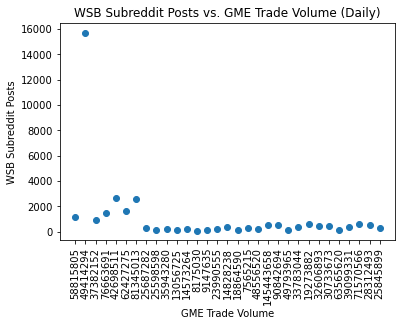

In [79]:
# Define x values and y values
x_values = corresponding_daily_gme["Trade Volume Daily"].values.astype(float)
y_values = daily_wsb_market_open["Count"].values.astype(float)

# Calculate correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values =  x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with best fit line
plt.scatter(corresponding_daily_gme["Trade Volume Daily"].values, daily_wsb_market_open["Count"].values)

# Label title and axes, display equation for best fit line
plt.title("WSB Subreddit Posts vs. GME Trade Volume (Daily)")
plt.xlabel("GME Trade Volume")
plt.ylabel("WSB Subreddit Posts")
plt.xticks(rotation=90)

# Show plot
plt.show()

In [72]:
# Remove outliers from DataFrame
gme_daily_no_outliers = corresponding_daily_gme.iloc[7:31]

wsb_daily_no_outliers = daily_wsb_market_open.drop(labels=[0, 1, 4, 5, 6, 7, 8], axis=0)

The r-squared value is: 0.47


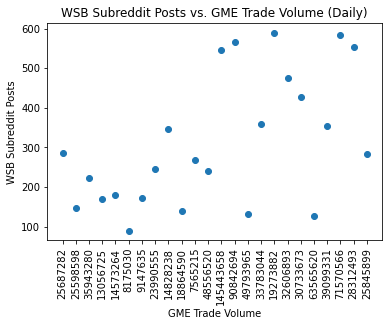

In [78]:
# Define x values and y values
x_values = gme_daily_no_outliers["Trade Volume Daily"].values.astype(float)
y_values = wsb_daily_no_outliers["Count"].values.astype(float)

# Calculate correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values =  x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with best fit line
plt.scatter(gme_daily_no_outliers["Trade Volume Daily"].values, wsb_daily_no_outliers["Count"].values)

# Label title and axes, display equation for best fit line
plt.title("WSB Subreddit Posts vs. GME Trade Volume (Daily)")
plt.xlabel("GME Trade Volume")
plt.ylabel("WSB Subreddit Posts")
plt.xticks(rotation=90)

# Show plot
plt.show()